## 1. Load data

In [1]:
import pandas as pd
train = pd.read_csv('data/train.csv', index_col='PassengerId')
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test = pd.read_csv('data/test.csv', index_col='PassengerId')
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Explore data

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


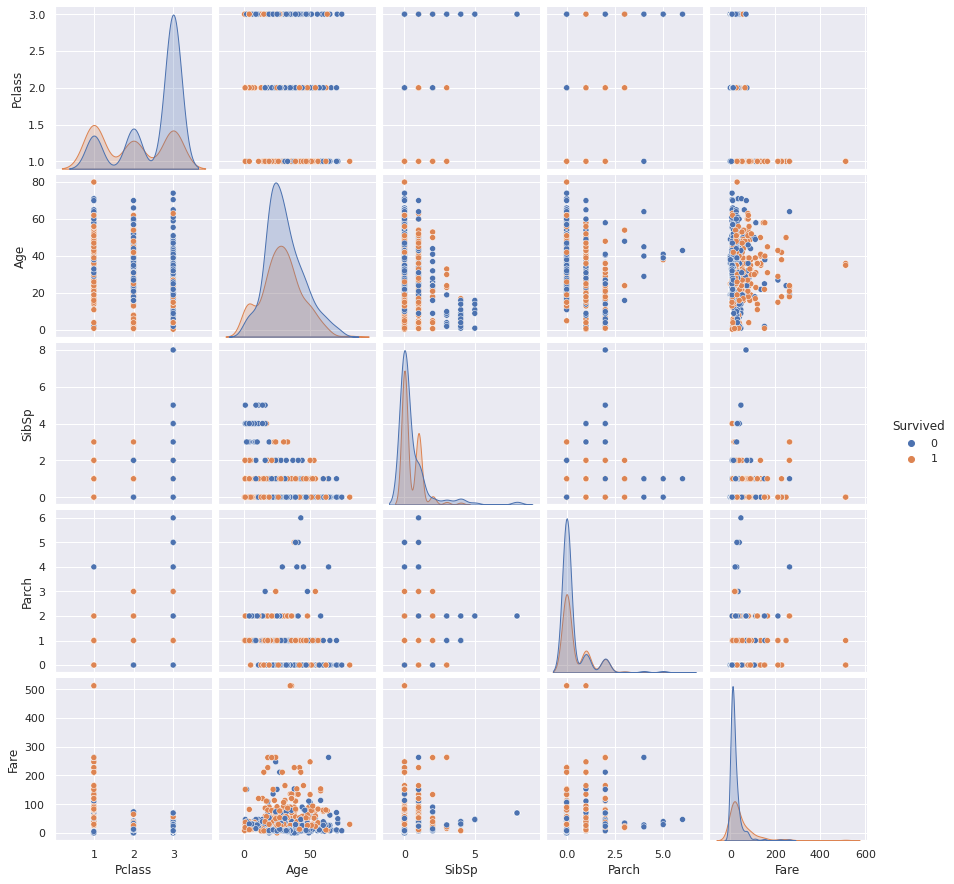

In [5]:
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived');

### 2.1 Sex

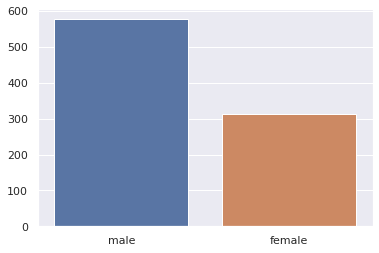

In [6]:
sex_counts = train['Sex'].value_counts()
sns.barplot(y=sex_counts.values, x=sex_counts.index);

In [7]:
sex_counts.sort_index()

female    314
male      577
Name: Sex, dtype: int64

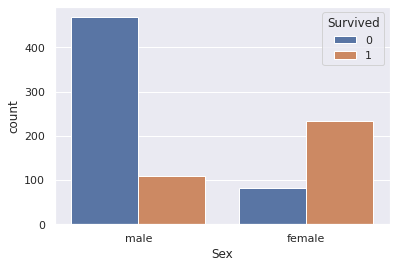

In [8]:
sns.countplot(data=train, x='Sex', hue='Survived');

In [9]:
pd.pivot_table(train, index='Sex', values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


Female's survival rate is 74.2% and Male's survival rate is 18.9% . So  female's survival rate is higher than male, that means that 'Sex' feature is very important in this data.

Plus, it's important to explore how to find surviving men, because most of men died.

### 2.2 Pclass

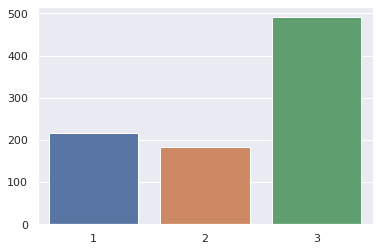

In [10]:
pclass_counts = train.Pclass.value_counts()
sns.barplot(y=pclass_counts.values, x=pclass_counts.index);

In [11]:
pclass_counts.sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

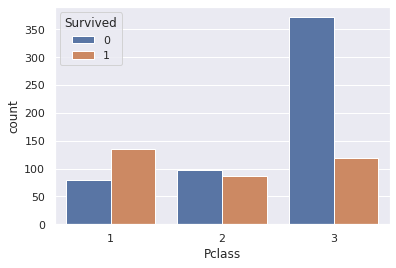

In [12]:
sns.countplot(data=train, x='Pclass', hue='Survived');

In [13]:
pd.pivot_table(train, index='Pclass', values='Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


From this data, the higher class is higher survival rate.

### 2.3 Name

In [14]:
train['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [15]:
import re
honorifics = train['Name'].map(lambda x: re.split(r'[,.]', x)[1].strip())
honorifics.head()

PassengerId
1      Mr
2     Mrs
3    Miss
4     Mrs
5      Mr
Name: Name, dtype: object

In [16]:
honorifics.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [17]:
train.loc[train['Name'].str.contains('Mr'), 'Honorific'] = 'Mr'
train.loc[train['Name'].str.contains('Miss'), 'Honorific'] = 'Miss'
train.loc[train['Name'].str.contains('Mrs'), 'Honorific'] = 'Mrs'
train.loc[train['Name'].str.contains('Master'), 'Honorific'] = 'Master'
print(train.shape)
train[['Name', 'Honorific']].head(10)

(891, 12)


,Name,Honorific
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


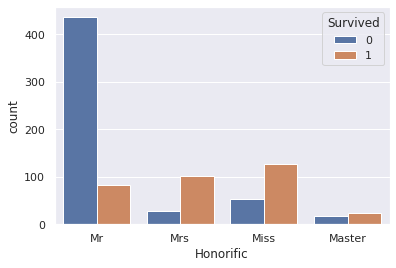

In [18]:
sns.countplot(data=train, x='Honorific', hue='Survived');

In [19]:
pd.pivot_table(train, index='Honorific', values='Survived')

,Survived
Honorific,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


Despite the fact that "Master" is a male title, its survival rate does not exceed 57.5%.

In [20]:
by_honorific_pclass = train.groupby(['Honorific', 'Pclass'])
honorific_counts = by_honorific_pclass.size().unstack()
honorific_counts

Pclass,1,2,3
Honorific,,,
Master,3,9,28
Miss,46,32,102
Mr,108,91,319
Mrs,44,43,42


In [21]:
honorific_counts.sum(1).nlargest(10)

Honorific
Mr        518
Miss      180
Mrs       129
Master     40
dtype: int64

In [22]:
indexer = honorific_counts.sum(1).argsort()
indexer

Honorific
Master    0
Miss      3
Mr        1
Mrs       2
dtype: int64

In [23]:
count_subset = honorific_counts.take(indexer)
count_subset

Pclass,1,2,3
Honorific,,,
Master,3,9,28
Mrs,44,43,42
Miss,46,32,102
Mr,108,91,319


In [24]:
count_subset = count_subset.stack()

In [25]:
count_subset.name = 'Total'

In [26]:
count_subset = count_subset.reset_index()
count_subset

,Honorific,Pclass,Total
0,Master,1,3
1,Master,2,9
2,Master,3,28
3,Mrs,1,44
4,Mrs,2,43
5,Mrs,3,42
6,Miss,1,46
7,Miss,2,32
8,Miss,3,102
9,Mr,1,108


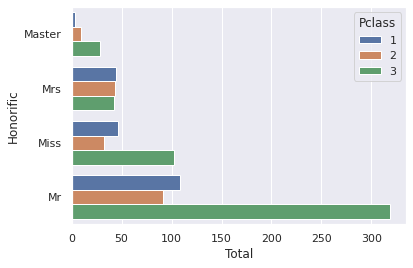

In [27]:
sns.barplot(x='Total', y='Honorific', hue='Pclass', data=count_subset);

### 2.4 Embarked

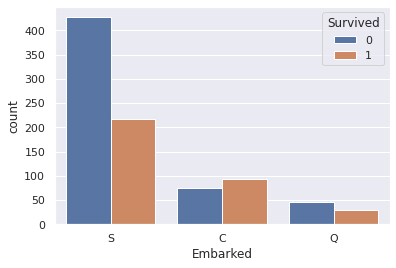

In [28]:
sns.countplot(data=train, x='Embarked', hue='Survived');

In [29]:
pd.pivot_table(train, index='Embarked', values='Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


As can be seen from the graph, most people were from C (Cherbourg), but the survival rate of people from S (Southampton) is higher.

### 2.5 Age&Fare

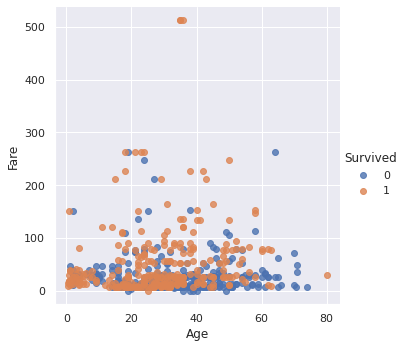

In [30]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived', fit_reg=False);

In [31]:
low_fare = train[train['Fare'] < 500]  # Remove outlier
train.shape, low_fare.shape   #Compare the number of rows

((891, 12), (888, 12))

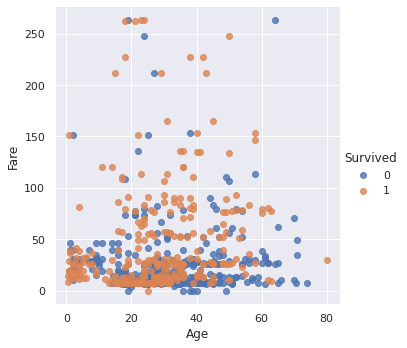

In [32]:
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived', fit_reg=False);

In [33]:
low_low_fare = train[train['Fare'] < 100]  # Remove outlier again

In [34]:
train.shape, low_fare.shape, low_low_fare.shape

((891, 12), (888, 12), (838, 12))

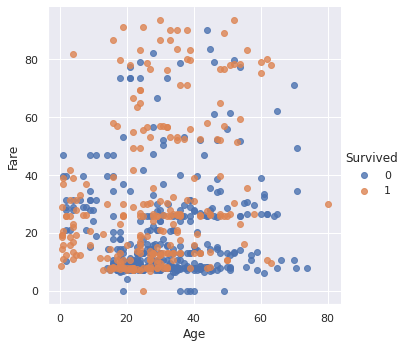

In [35]:
sns.lmplot(data=low_low_fare, x='Age', y='Fare', hue='Survived', fit_reg=False);

Passengers under the age of 15 who paid less than $20 for travel were more likely to survive.

In [36]:
train['Age'].head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [37]:
age_counts = train['Age'].value_counts()
age_counts.head(10)

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

In [38]:
age_fillin = train['Age'].fillna('Missing')
age_counts = age_fillin.value_counts()
age_counts.head(10)

Missing    177
24.0        30
22.0        27
18.0        26
28.0        25
30.0        25
19.0        25
21.0        24
25.0        23
36.0        22
Name: Age, dtype: int64

In [39]:
subset = age_counts[:10]

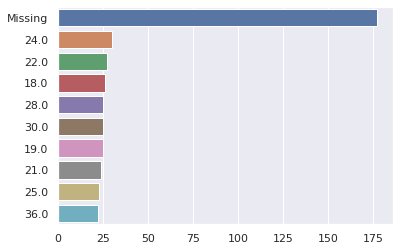

In [40]:
sns.barplot(y=subset.index, x=subset.values);

### 2.6 SibSp, Parch

In [41]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1  #including himself
print(train.shape)
train[['SibSp', 'Parch', 'FamilySize']].head()

(891, 13)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


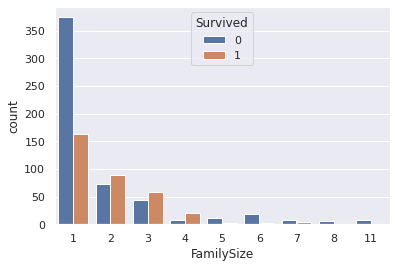

In [42]:
sns.countplot(data=train, x='FamilySize', hue='Survived');

A passenger consisting of a family of 2 to 4 people has a relatively high probability of survival.

In [43]:
train.loc[train['FamilySize'] == 1, 'FamilyType'] = 'Single'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize'] < 5), 'FamilyType'] = 'Nuclear'
train.loc[train['FamilySize'] >= 5, 'FamilyType'] = 'Big'
print(train.shape)
train[['FamilySize', 'FamilyType']].head()

(891, 14)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single


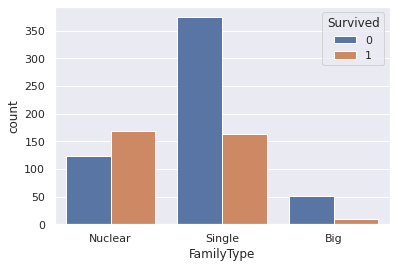

In [44]:
sns.countplot(data=train, x='FamilyType', hue='Survived');

In [45]:
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


Nuclear family has the relatively hige survival rate (about 57.8%).

## 3 Preprocessing

### Pclass

### 3.1 Name

In [46]:
train['Master'] = train['Name'].str.contains('Master')
print(train.shape)
train[['Name', 'Master']].head(10)

(891, 15)


,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False
6,"Moran, Mr. James",False
7,"McCarthy, Mr. Timothy J",False
8,"Palsson, Master. Gosta Leonard",True
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False


In [47]:
test['Master'] = test['Name'].str.contains('Master')
print(test.shape)
test[['Name', 'Master']].head(10)

(418, 11)


,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False
897,"Svensson, Mr. Johan Cervin",False
898,"Connolly, Miss. Kate",False
899,"Caldwell, Mr. Albert Francis",False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False


### 3.2 Sex 

In [48]:
train['Sex_encode'] = train['Sex'].map({'female': 0, 'male': 1})
print(train.shape)
train[['Sex', 'Sex_encode']].head()

(891, 16)


,Sex,Sex_encode
PassengerId,,
1,male,1
2,female,0
3,female,0
4,female,0
5,male,1


In [49]:
test['Sex_encode'] = test['Sex'].map({'female': 0, 'male': 1})
print(test.shape)
test[['Sex', 'Sex_encode']].head()

(418, 12)


,Sex,Sex_encode
PassengerId,,
892,male,1
893,female,0
894,male,1
895,male,1
896,female,0


### 3.3 Age

In [50]:
train['Age'].head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [51]:
train['Age_fillin'] = train['Age'].fillna(method='ffill')
train['Age_fillin'].head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6     35.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age_fillin, dtype: float64

In [52]:
test['Age_fillin'] = test['Age'].fillna(method='ffill')
test['Age_fillin'].head(10)

PassengerId
892    34.5
893    47.0
894    62.0
895    27.0
896    22.0
897    14.0
898    30.0
899    26.0
900    18.0
901    21.0
Name: Age_fillin, dtype: float64

In [53]:
train['Child'] = train['Age_fillin'] < 15
print(train.shape)
train[['Age_fillin', 'Child']].head()

(891, 18)


,Age_fillin,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False


In [54]:
test['Child'] = test['Age_fillin'] < 15
print(test.shape)
test[['Age_fillin', 'Child']].head()

(418, 14)


,Age_fillin,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False


###  3.4 Family size

In [55]:
train[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [56]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)
test[["SibSp", "Parch", "FamilySize"]].head()

(418, 15)


,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [57]:
train["Single"] = train["FamilySize"] == 1
train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)
train["Big"] = train["FamilySize"] >= 5
print(train.shape)
train[["FamilySize", "Single", "Nuclear", "Big"]].head()

(891, 21)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False


In [58]:
test['Single'] = test['FamilySize'] == 1
test['Nuclear'] = (test['FamilySize'] > 1) & (test['FamilySize'] < 5)
test['Big'] = test['FamilySize'] >= 5
print(test.shape)
test[['FamilySize', 'Single', 'Nuclear', 'Big']].head()

(418, 18)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False


### 3.5 Fare

In [59]:
train[train['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Honorific,FamilySize,FamilyType,Master,Sex_encode,Age_fillin,Child,Single,Nuclear,Big
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [60]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Sex_encode,Age_fillin,Child,FamilySize,Single,Nuclear,Big
PassengerId,,,,,,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,False,1,60.5,False,1,True,False,False


In [61]:
train['Fare_fillin'] = train['Fare']
print(train.shape)
train[['Fare', 'Fare_fillin']].head()

(891, 22)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [62]:
test['Fare_fillin'] = test['Fare']
print(test.shape)
test[['Fare', 'Fare_fillin']].head()

(418, 19)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [63]:
train['Fare'].mean()

32.204207968574636

In [64]:
test.loc[test['Fare'].isnull(), 'Fare_fillin'] = 32
test.loc[test['Fare'].isnull(), ['Fare', 'Fare_fillin']]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,32.0


### 3.6 Embarked

In [65]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'
print(train.shape)
train[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

(891, 25)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [66]:
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'
print(test.shape)
test[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

(418, 22)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


## 4 Train

In [67]:
feature_names = ['Pclass', 'Sex_encode', 'Fare_fillin',
                 'Embarked_C', 'Embarked_S', 'Embarked_Q',
                 'Child', 'Single', 'Nuclear', 'Big', 'Master']
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Child',
 'Single',
 'Nuclear',
 'Big',
 'Master']

In [68]:
label_name = 'Survived'
label_name

'Survived'

In [69]:
Xtrain = train[feature_names]
print(Xtrain.shape)
Xtrain.head()

(891, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
1,3,1,7.2500,False,True,False,False,False,True,False,False
2,1,0,71.2833,True,False,False,False,False,True,False,False
3,3,0,7.9250,False,True,False,False,True,False,False,False
4,1,0,53.1000,False,True,False,False,False,True,False,False
5,3,1,8.0500,False,True,False,False,True,False,False,False


In [70]:
Xtest = test[feature_names]
print(Xtest.shape)
Xtest.head()

(418, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
892,3,1,7.8292,False,False,True,False,True,False,False,False
893,3,0,7.0000,False,True,False,False,False,True,False,False
894,2,1,9.6875,False,False,True,False,True,False,False,False
895,3,1,8.6625,False,True,False,False,True,False,False,False
896,3,0,12.2875,False,True,False,False,False,True,False,False


In [71]:
ytrain = train[label_name]
print(ytrain.shape)
ytrain.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8, random_state=0)

model.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=8, random_state=0)

## 5 Predict

In [73]:
predictions = model.predict(Xtest)
print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

## 6 Submit

In [74]:
submission = pd.read_csv('data/gender_submission.csv')
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [75]:
submission['Survived'] = predictions
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
submission.to_csv('submission.csv', index=False)